In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb")) 
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:])) #Convolutional layer (64 units, 3x3 window and 2nd column of the data)
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Do the process again
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  #We have to flatten the data because convolutional data is 2D but dense is 1D dataset
model.add(Dense(64))  #64 nodes

model.add(Dense(1))               #
model.add(Activation('sigmoid'))  # Output Layer (In total 4 layers)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1) #Pass the data 32 at a time

Epoch 1/3
702/702 [==============================] - 45s 64ms/step - loss: 0.6586 - accuracy: 0.6067 - val_loss: 0.6256 - val_accuracy: 0.6585
Epoch 2/3
702/702 [==============================] - 45s 65ms/step - loss: 0.5692 - accuracy: 0.7063 - val_loss: 0.5541 - val_accuracy: 0.7283
Epoch 3/3
702/702 [==============================] - 46s 65ms/step - loss: 0.5000 - accuracy: 0.7609 - val_loss: 0.5051 - val_accuracy: 0.7551


In [45]:
X.shape

(24946, 50, 50, 1)

In [46]:
prediction = model.predict([X])

In [49]:
import numpy as np
print(np.argmax(prediction[3])) #zero for dogs, 1 for cats

0


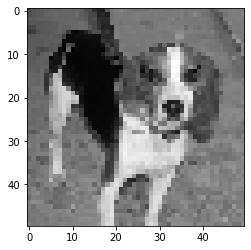

In [50]:
import matplotlib.pyplot as plt
plt.imshow(X[3], cmap = 'gray') #We can confirm from image that it is a dog
plt.show()

(50, 50, 1)